# DBSCAN

## Book ML

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/datasets/cf391fa1a7babe490fdd10c088f0ca1b6d377f59/shopping-data.csv", header=0, index_col=0)
print(data.shape)
data

(200, 4)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values
print(X.shape)

(200, 2)


In [4]:
std = MinMaxScaler()
X_std = std.fit_transform(X)

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

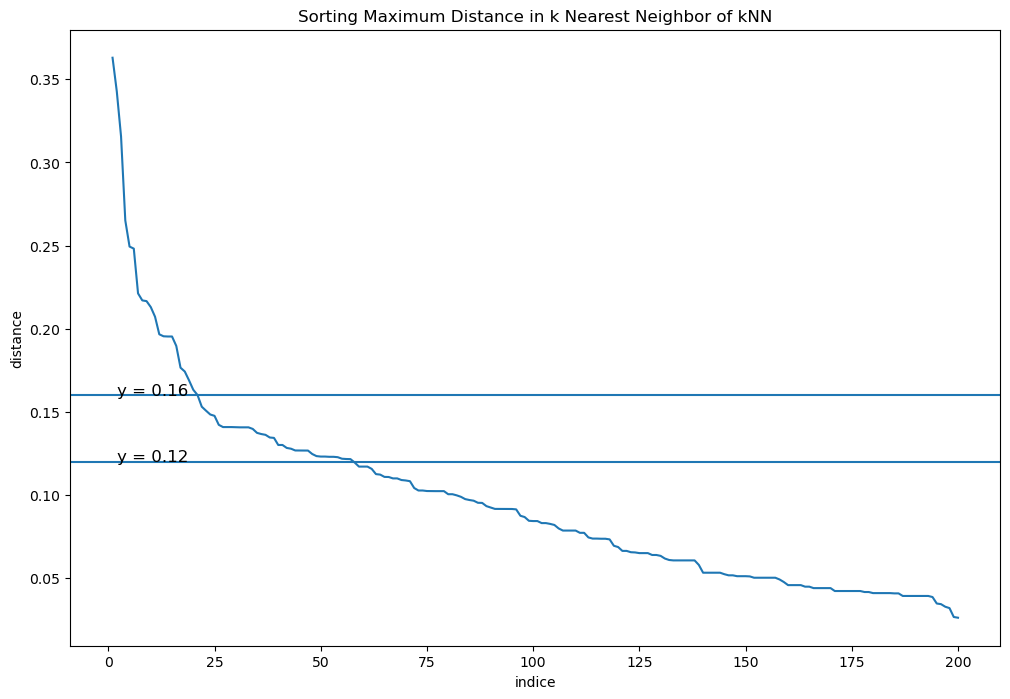

In [5]:
from sklearn.neighbors import NearestNeighbors


# Xây dựng mô hình k-Means với k=10
neighbors = 10
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.12)
plt.text(2, 0.12, 'y = 0.12', fontsize=12)
plt.axhline(y=0.16)
plt.text(2, 0.16, 'y = 0.16', fontsize=12)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

In [6]:
print(distances)

[[0.         0.0193098  0.06391148 ... 0.19289244 0.19908888 0.20719196]
 [0.         0.04163122 0.04578372 ... 0.11002716 0.11568282 0.13006514]
 [0.         0.01639344 0.03926558 ... 0.11655469 0.12782296 0.14083081]
 ...
 [0.         0.07086457 0.12869934 ... 0.26738994 0.27033715 0.31562638]
 [0.         0.13616851 0.14083081 ... 0.32113452 0.35763969 0.36295803]
 [0.         0.12869934 0.14519916 ... 0.32929484 0.33241707 0.34267345]]


Đây là ma trận khoảng cách mà mỗi dòng là k khoảng cách của k điểm gần nhất với điểm đang xét (lưu ý k điểm gần nhất luôn chứa điểm đang xét).

In [8]:
print(indices)

[[  0   4  16 ...  40  42  48]
 [  1   3  15 ...  21  23  29]
 [  2   6   8 ...  30  24  32]
 ...
 [197 195 199 ... 181 183 177]
 [198 196 194 ... 182 180 178]
 [199 197 195 ... 181 187 185]]


Đây là ma trận mà mỗi dòng là tập hợp chỉ số của k điểm gần nhất với điểm đang xét (lưu ý là luôn chứa điểm đang xét).

In [10]:
DBSCAN(eps=0.5,
 min_samples=5, 
 metric='euclidean', 
 algorithm='auto'
)

DBSCAN()

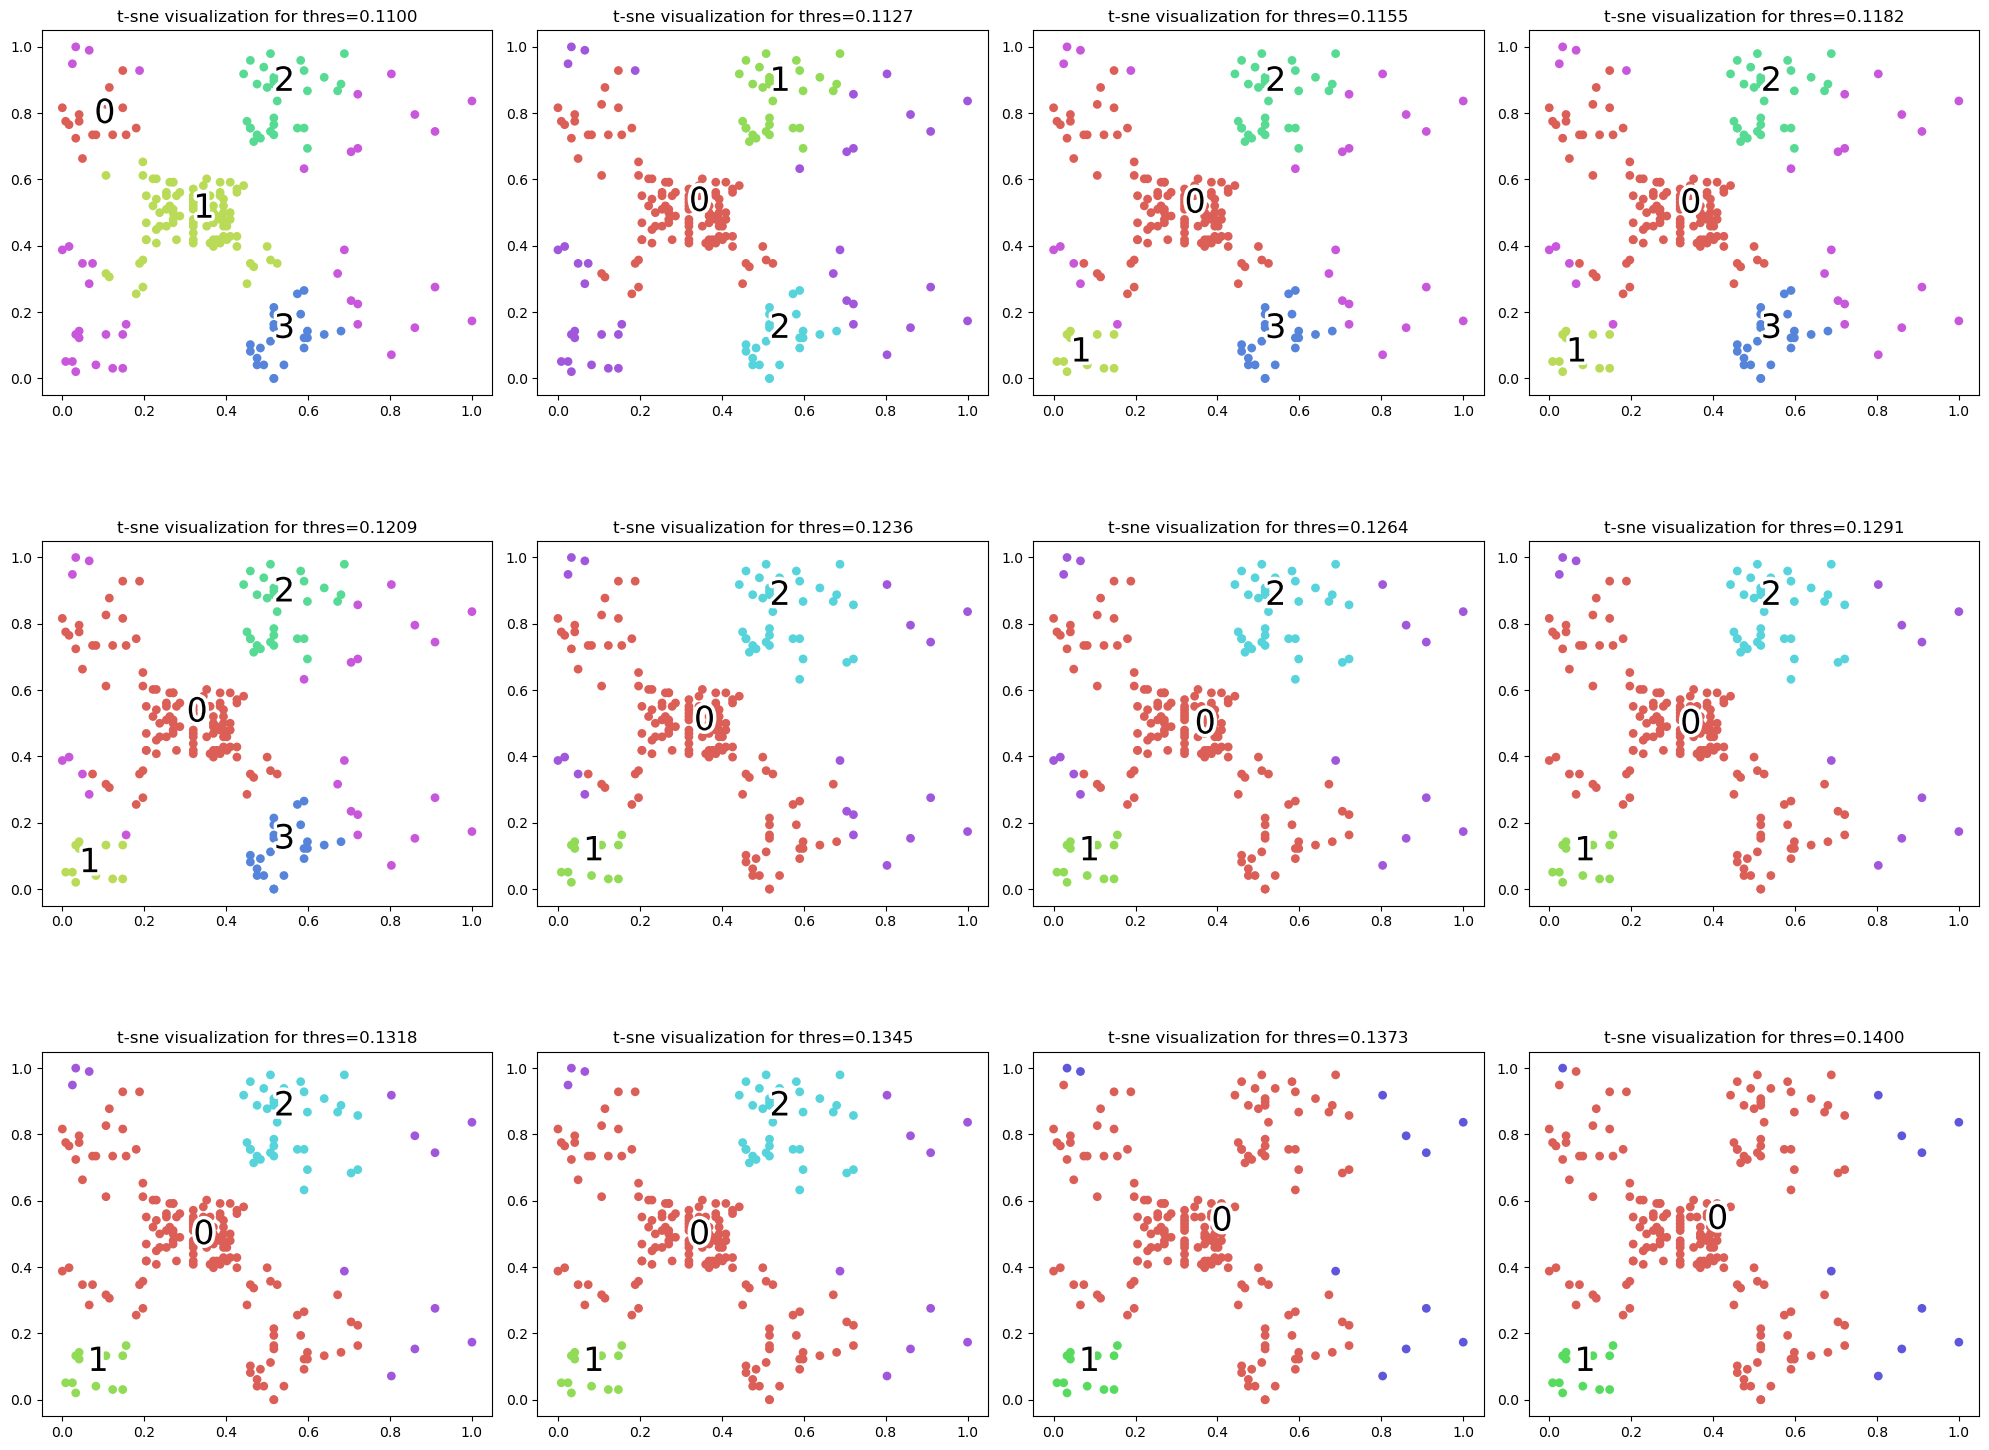

In [11]:
from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

def _plot_kmean_scatter(X, labels, gs, thres):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

gs = GridSpec(3, 4)
plt.figure(figsize = (25, 18))
plt.subplots_adjust(wspace=0.1,hspace=0.4)

for i, thres in enumerate(np.linspace(0.11, 0.14, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=11, metric='euclidean')
    labels = dbscan.fit_predict(X_std)
    _plot_kmean_scatter(X_std, labels, gs[i], thres)

## Testing DBSCAN with another datasets

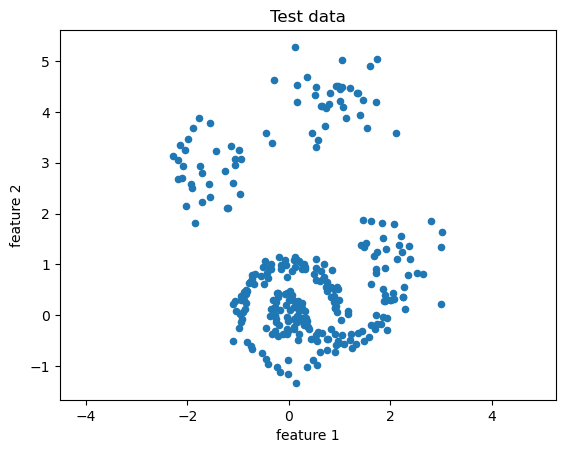

In [2]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np
import matplotlib.pyplot as plt

def create_complex_dataset():
    np.random.seed(0)
    
    X_moons, _ = make_moons(n_samples=100, noise=0.1, random_state=0)
    X_circles, _ = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
    X_blobs, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.5, random_state=0)
    X = np.vstack([X_moons, X_circles, X_blobs])
    return X

X_complex = create_complex_dataset()

plt.scatter(X_complex[:, 0], X_complex[:, 1], s=20)
plt.title('Test data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.axis('equal')
plt.show()

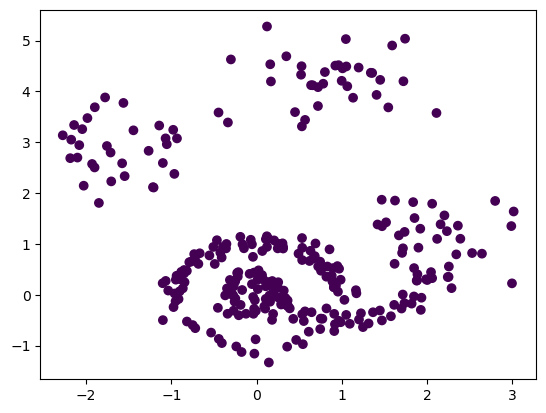

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.012, min_samples=11,algorithm='auto',metric='euclidean')
y_pred = model.fit_predict(X_complex)
plt.scatter(x=X_complex[:, 0], y=X_complex[:, 1], c=y_pred)

In [14]:
neighbors = 11 - 1
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(X_complex)

distances, indices = nbrs.kneighbors(X_complex)

In [15]:
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

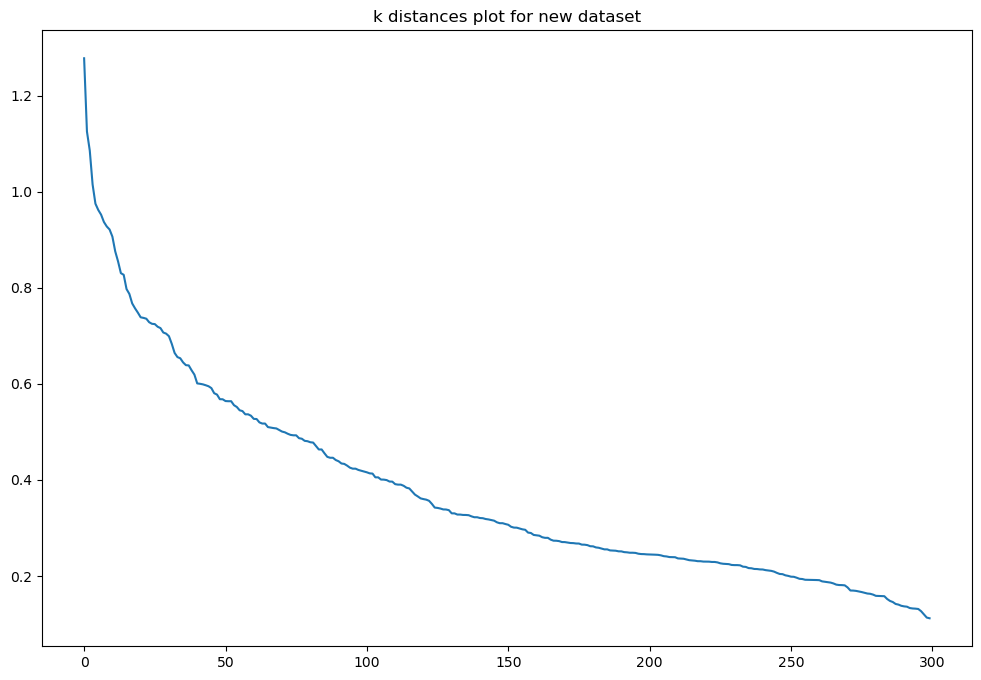

In [80]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(distance_desc)), distance_desc)
plt.title('k distances plot for new dataset')
plt.show()

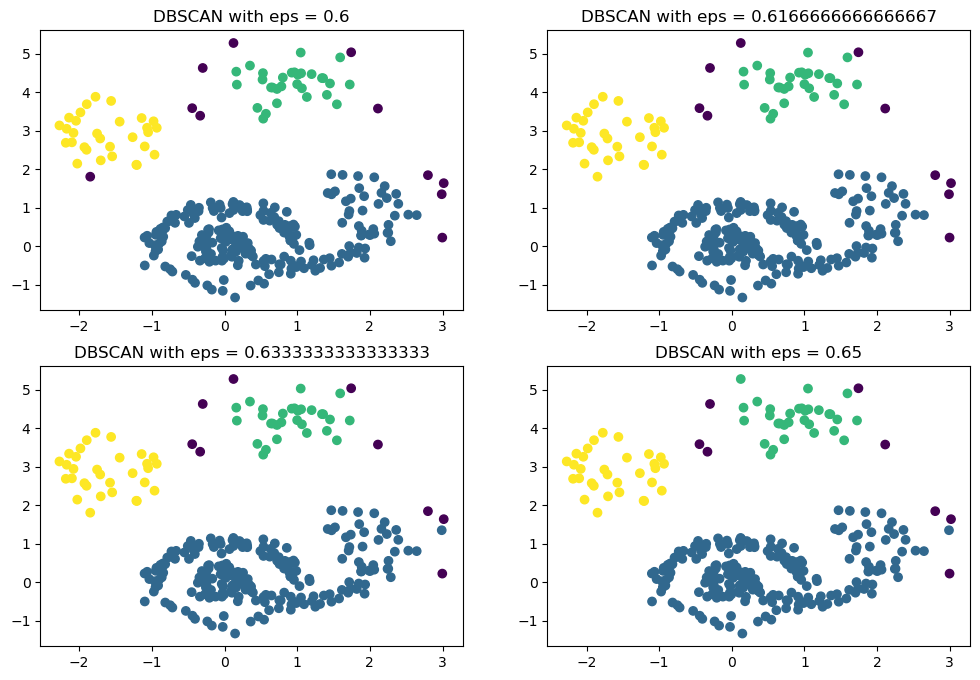

<Figure size 1200x400 with 0 Axes>

In [94]:
fig, ax = plt.subplots(2,2, figsize = (12, 8))
plt.figure(figsize=(12, 4))

eps = np.linspace(0.6, 0.65, 4)
k = 0
for i in range(2):
    for j in range(2):
        model = DBSCAN(eps=eps[k], min_samples=11)
        y_pred = model.fit_predict(X_complex)
        ax[i, j].scatter(X_complex[:,0], y=X_complex[:, 1], c=y_pred)
        ax[i, j].title.set_text(f'DBSCAN with eps = {eps[k]}')
        k += 1

Ta thấy thuật toán chạy khá hiệu quả với eps = 0.6166666

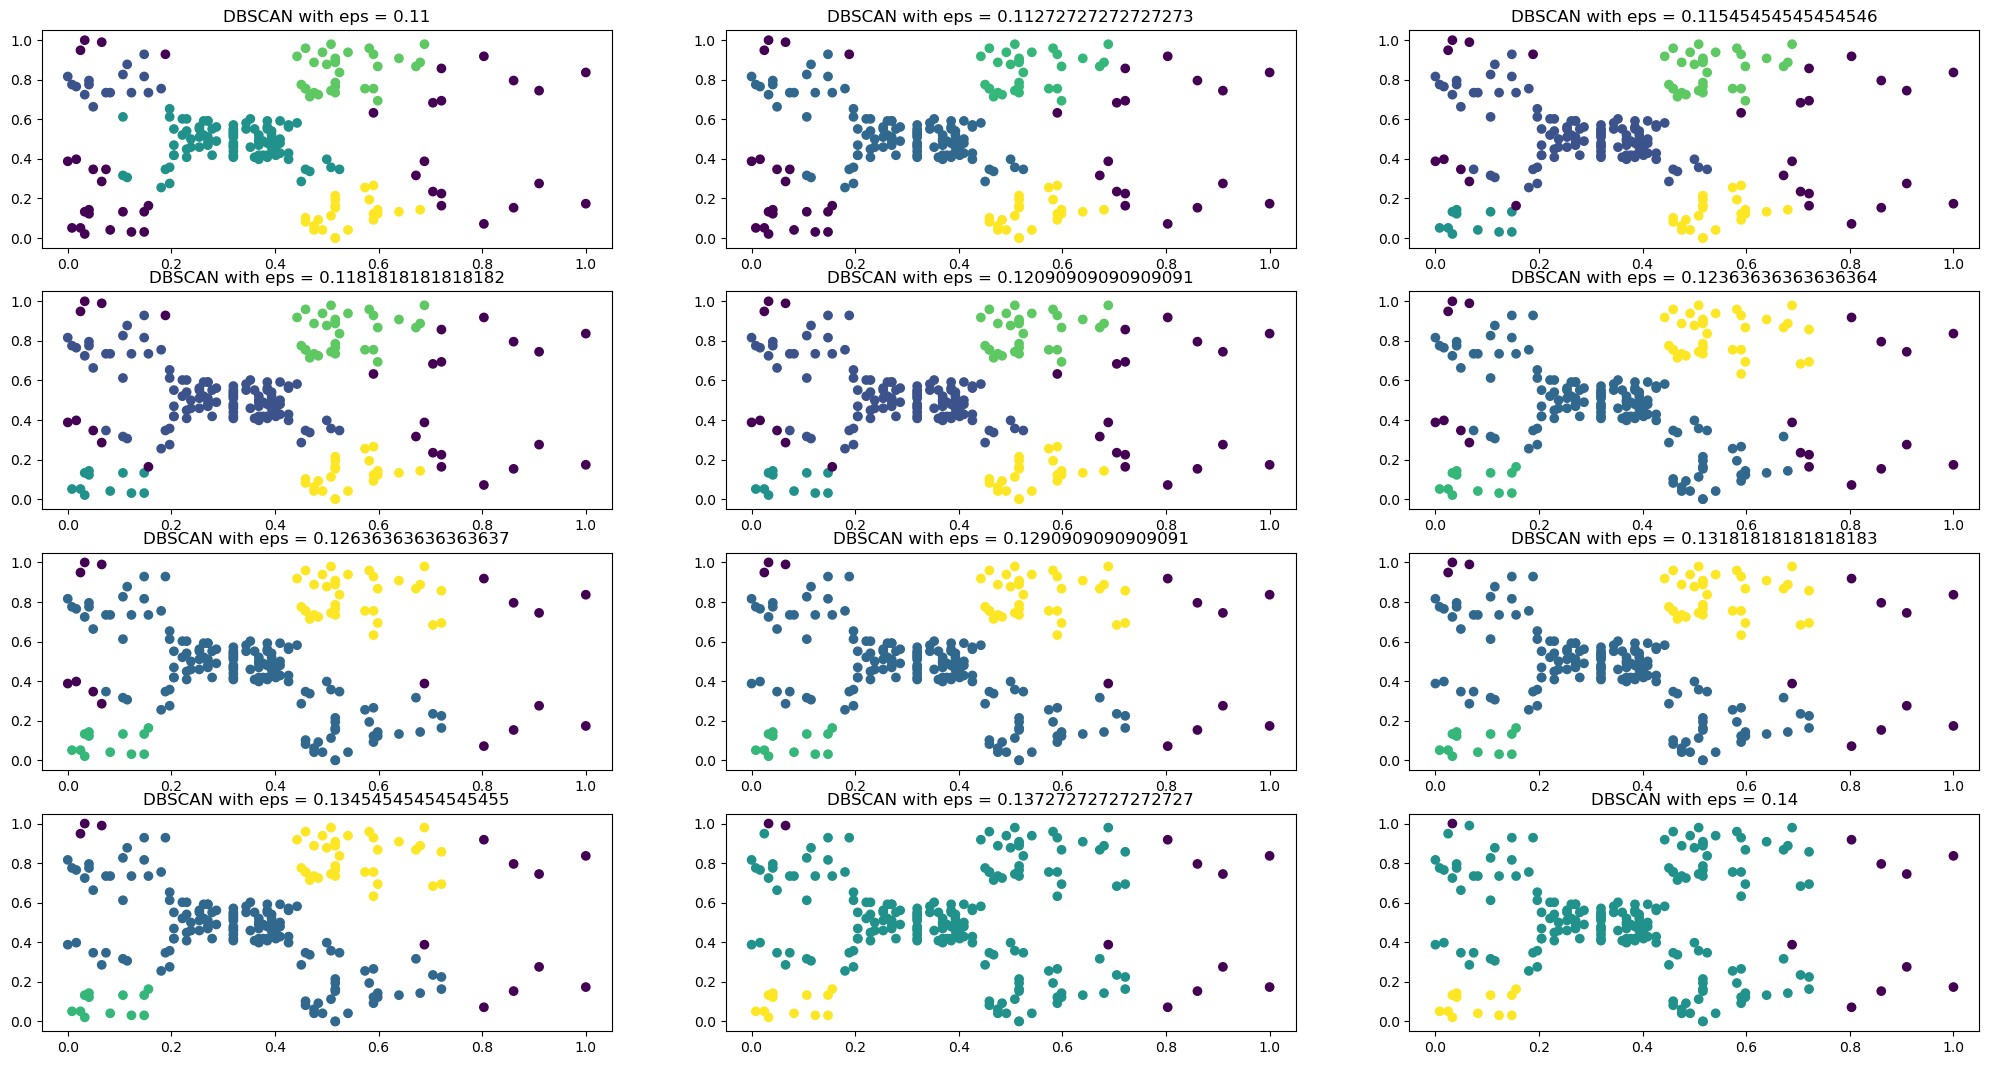

In [78]:
eps = np.linspace(0.11, 0.14, 12)
fig, ax = plt.subplots(4, 3, figsize=(25,13))
k = 0
for i in range(4):
    for j in range(3):
        model = DBSCAN(eps=eps[k], min_samples=11)
        y_pred = model.fit_predict(X_std)
        ax[i, j].scatter(X_std[:,0], y=X_std[:, 1], c=y_pred)
        ax[i, j].title.set_text(f'DBSCAN with eps = {eps[k]}')
        k += 1